Veri seti: https://huggingface.co/datasets/WhiteAngelss/Turkce-Duygu-Analizi-Dataset

In [ ]:
!pip install -q datasets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

sns.set(style="whitegrid")


In [ ]:
dataset = load_dataset("WhiteAngelss/Turkce-Duygu-Analizi-Dataset")

train_ds = dataset["train"]

df = train_ds.to_pandas()

print("Toplam kayıt sayısı:", len(df))
df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/76.1M [00:00<?, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/440679 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/48965 [00:00<?, ? examples/s]

Toplam kayıt sayısı: 440679


,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari


In [ ]:
df.info()
print(df["label"].unique())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440679 entries, 0 to 440678
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     440679 non-null  object
 1   label    440679 non-null  object
 2   dataset  440679 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB
['Positive' 'Notr' 'Negative']


,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari
5,telefon gayet güzel ben kırmızı aldım baya şık...,Positive,urun_yorumlari
6,Sert ve acımasız özelliklere sahiptir .,Notr,wiki
7,harika bir kokusu var ve tüm odayı sarıyor..,Positive,urun_yorumlari
8,ürün orjinal ve gerçekten fiyat performans ürü...,Positive,urun_yorumlari
9,Zaten filmde Şener Şen olması ve Türkiyenin g...,Positive,HUMIR


Dengesiz Veri olduğunu gördük

Veri setindeki sınıf sayıları:
label
Positive    235949
Notr        153825
Negative     50905
Name: count, dtype: int64


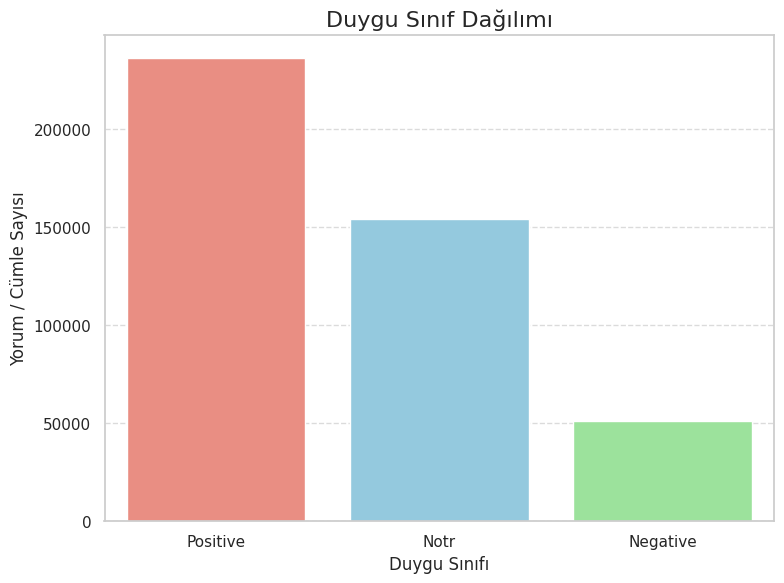

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Veri setindeki sınıf sayıları:")
print(df["label"].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(
    x="label",
    data=df,
    hue="label",
    palette=["salmon", "skyblue", "lightgreen"],
    legend=False
)
plt.title("Duygu Sınıf Dağılımı", fontsize=16)
plt.xlabel("Duygu Sınıfı", fontsize=12)
plt.ylabel("Yorum / Cümle Sayısı", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip install -q TurkishStemmer

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from TurkishStemmer import TurkishStemmer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

turkish_stopwords = set(stopwords.words("turkish"))

stemmer = TurkishStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess_text_stemmer(text: str) -> str:
    if not isinstance(text, str):
        text = str(text)

    text = text.replace("İ", "i").replace("I", "ı")

    text = text.lower()

    text = re.sub(r"\d+", " ", text)

    text = re.sub(r"[^a-zçğıöşü\s]", " ", text)

    text = re.sub(r"\s+", " ", text).strip()

    if not text:
        return ""

    tokens = word_tokenize(text, language="turkish")

    cleaned_tokens = []
    for tok in tokens:
        tok = tok.strip()
        if not tok:
            continue

        if tok in turkish_stopwords:
            continue

        if len(tok) <= 2:
            continue

        stem = stemmer.stem(tok)

        if stem and stem not in turkish_stopwords:
            cleaned_tokens.append(stem)

    return " ".join(cleaned_tokens)


In [ ]:
!pip install -q tqdm

from tqdm.notebook import tqdm
tqdm.pandas()

df["text_clean"] = df["text"].progress_apply(preprocess_text_stemmer)
display(df[["text", "text_clean", "label", "dataset"]].head(10))
df.to_csv("turkce_duygu_analizi_clean_full.csv", index=False)



  0%|          | 0/440679 [00:00<?, ?it/s]

,text,text_clean,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,ürün hepsiburada alal haf olt orjinal eksiks ş...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",ürün memnu kesinlik herk tavsi eder ayrı hepsi...,Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",hızl kargo tem alışveriş teşekkür eder,Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,aranan tapınak bölge,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,telefon başl al elim samsung ar yeters gelme n...,Positive,urun_yorumlari
5,telefon gayet güzel ben kırmızı aldım baya şık...,telefon gayet güzel ben kır al ba şık görünüyo...,Positive,urun_yorumlari
6,Sert ve acımasız özelliklere sahiptir .,sert acımas özellik sahip,Notr,wiki
7,harika bir kokusu var ve tüm odayı sarıyor..,harika bir koku var oday sarıyor,Positive,urun_yorumlari
8,ürün orjinal ve gerçekten fiyat performans ürü...,ürün orjinal gerçek fiyat performans ürün tavs...,Positive,urun_yorumlari
9,Zaten filmde Şener Şen olması ve Türkiyenin g...,zaten film şener şen olma türkiye gerçek göste...,Positive,HUMIR


In [ ]:
import numpy as np

# Label → id
label2id = {"Negative": 0, "Notr": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
df["label_id"] = df["label"].map(label2id)


# her sınıftan en fazla 4000 örnek
max_per_class = 4000

df_used = (
    df.groupby("label", group_keys=False)
      .apply(lambda g: g.sample(min(len(g), max_per_class), random_state=42))
      .reset_index(drop=True)
)

print("Kullanılan veri boyutu:", df_used.shape)
print(df_used["label"].value_counts())


Kullanılan veri boyutu: (12000, 5)
label
Negative    4000
Notr        4000
Positive    4000
Name: count, dtype: int64


/tmp/ipython-input-4050425028.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(len(g), max_per_class), random_state=42))


In [ ]:
from sklearn.model_selection import train_test_split

X_raw = df_used["text"].tolist()
X_clean = df_used["text_clean"].tolist()
y = df_used["label_id"].tolist()

indices = np.arange(len(y))

train_idx, test_idx, y_train, y_test = train_test_split(
    indices,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

train_raw  = [X_raw[i] for i in train_idx]
test_raw   = [X_raw[i] for i in test_idx]
train_clean = [X_clean[i] for i in train_idx]
test_clean  = [X_clean[i] for i in test_idx]

print("Eğitim veri sayısı:", len(train_raw))
print("Test veri sayısı:", len(test_raw))


Eğitim veri sayısı: 9600
Test veri sayısı: 2400


In [ ]:
!pip install -q transformers accelerate

import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
class DuyguDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label, dtype=torch.long),
        }


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
    }


In [ ]:
def train_and_evaluate(model_name, train_texts, test_texts, y_train, y_test, run_name):
    print(f"\nBaşlatılıyor: {run_name} (Model: {model_name})")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=3,
        id2label=id2label,
        label2id=label2id,
    )

    train_dataset = DuyguDataset(train_texts, y_train, tokenizer)
    test_dataset = DuyguDataset(test_texts, y_test, tokenizer)

    training_args = TrainingArguments(
        output_dir=f"./results/{run_name}",
        num_train_epochs=2,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        learning_rate=2e-5,
        warmup_steps=100,
        weight_decay=0.01,
        logging_dir=f"./logs/{run_name}",
        logging_steps=50,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        report_to="none",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    eval_metrics = trainer.evaluate()
    print("Değerlendirme sonuçları:", eval_metrics)

    preds_output = trainer.predict(test_dataset)
    preds = np.argmax(preds_output.predictions, axis=-1)

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[id2label[i] for i in range(3)])

    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(cmap="Blues", ax=ax, values_format="d")
    plt.title(f"Confusion Matrix – {run_name}")
    plt.grid(False)
    plt.show()

    return eval_metrics



Başlatılıyor: BERTurk_Clean (Model: dbmdz/bert-base-turkish-cased)


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.326800,0.305258,0.883333,0.882600,0.882389,0.883333
2,0.200100,0.307358,0.895000,0.894726,0.894510,0.895000


Değerlendirme sonuçları: {'eval_loss': 0.3073578178882599, 'eval_accuracy': 0.895, 'eval_f1': 0.8947255957415492, 'eval_precision': 0.8945104650174833, 'eval_recall': 0.895, 'eval_runtime': 18.6783, 'eval_samples_per_second': 128.491, 'eval_steps_per_second': 8.031, 'epoch': 2.0}


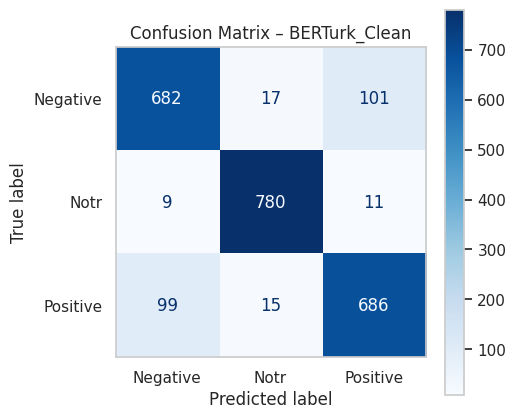

In [ ]:
results = []

# === MODEL 1: BERTurk ===
bert_model_name = "dbmdz/bert-base-turkish-cased"

# 1) BERTurk + CLEAN
res_bert_clean = train_and_evaluate(
    model_name=bert_model_name,
    train_texts=train_clean,
    test_texts=test_clean,
    y_train=y_train,
    y_test=y_test,
    run_name="BERTurk_Clean",
)
results.append({
    "Model": "BERTurk",
    "Data": "Clean",
    "Accuracy":  res_bert_clean["eval_accuracy"],
    "Precision": res_bert_clean["eval_precision"],
    "Recall":    res_bert_clean["eval_recall"],
    "F1":        res_bert_clean["eval_f1"],
})




Başlatılıyor: BERTurk_Raw (Model: dbmdz/bert-base-turkish-cased)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.233100,0.198700,0.930417,0.930379,0.930342,0.930417
2,0.096300,0.227641,0.935417,0.935430,0.935615,0.935417


Değerlendirme sonuçları: {'eval_loss': 0.22764073312282562, 'eval_accuracy': 0.9354166666666667, 'eval_f1': 0.9354301949143337, 'eval_precision': 0.9356150184581283, 'eval_recall': 0.9354166666666667, 'eval_runtime': 18.9, 'eval_samples_per_second': 126.984, 'eval_steps_per_second': 7.937, 'epoch': 2.0}


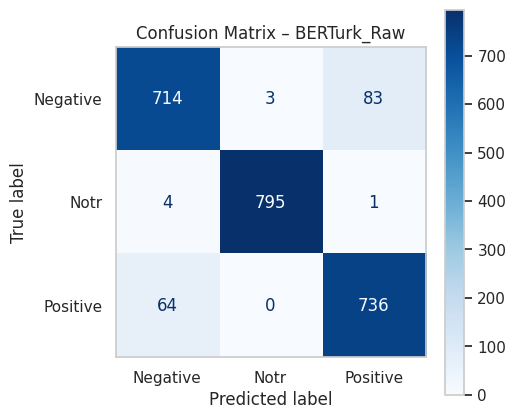

In [ ]:

# 2) BERTurk + RAW
res_bert_raw = train_and_evaluate(
    model_name=bert_model_name,
    train_texts=train_raw,
    test_texts=test_raw,
    y_train=y_train,
    y_test=y_test,
    run_name="BERTurk_Raw",
)
results.append({
    "Model": "BERTurk",
    "Data": "Raw",
    "Accuracy":  res_bert_raw["eval_accuracy"],
    "Precision": res_bert_raw["eval_precision"],
    "Recall":    res_bert_raw["eval_recall"],
    "F1":        res_bert_raw["eval_f1"],
})





Başlatılıyor: XLMR_Clean (Model: xlm-roberta-base)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.471500,0.372907,0.860000,0.860002,0.861841,0.860000
2,0.303000,0.383892,0.864167,0.863124,0.862928,0.864167


Değerlendirme sonuçları: {'eval_loss': 0.3838918209075928, 'eval_accuracy': 0.8641666666666666, 'eval_f1': 0.8631236182239959, 'eval_precision': 0.8629277612195233, 'eval_recall': 0.8641666666666666, 'eval_runtime': 17.256, 'eval_samples_per_second': 139.082, 'eval_steps_per_second': 8.693, 'epoch': 2.0}


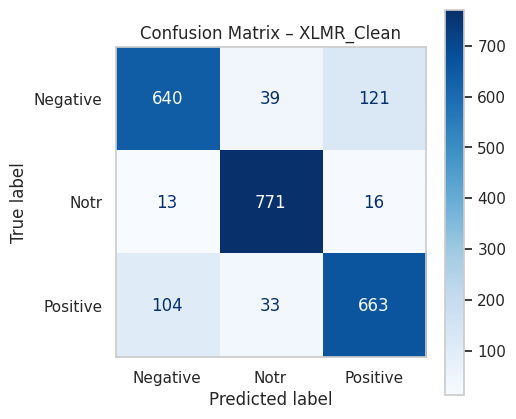

In [ ]:

# === MODEL 2: XLM-RoBERTa ===
roberta_model_name = "xlm-roberta-base"

# 3) XLM-R + CLEAN
res_xlmr_clean = train_and_evaluate(
    model_name=roberta_model_name,
    train_texts=train_clean,
    test_texts=test_clean,
    y_train=y_train,
    y_test=y_test,
    run_name="XLMR_Clean",
)
results.append({
    "Model": "XLM-RoBERTa",
    "Data": "Clean",
    "Accuracy":  res_xlmr_clean["eval_accuracy"],
    "Precision": res_xlmr_clean["eval_precision"],
    "Recall":    res_xlmr_clean["eval_recall"],
    "F1":        res_xlmr_clean["eval_f1"],
})


Başlatılıyor: XLMR_Raw (Model: xlm-roberta-base)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.237500,0.309318,0.912083,0.912009,0.912294,0.912083
2,0.177700,0.264040,0.920833,0.920926,0.921036,0.920833


Değerlendirme sonuçları: {'eval_loss': 0.2640398144721985, 'eval_accuracy': 0.9208333333333333, 'eval_f1': 0.9209261935561991, 'eval_precision': 0.921036475871006, 'eval_recall': 0.9208333333333333, 'eval_runtime': 17.5207, 'eval_samples_per_second': 136.981, 'eval_steps_per_second': 8.561, 'epoch': 2.0}


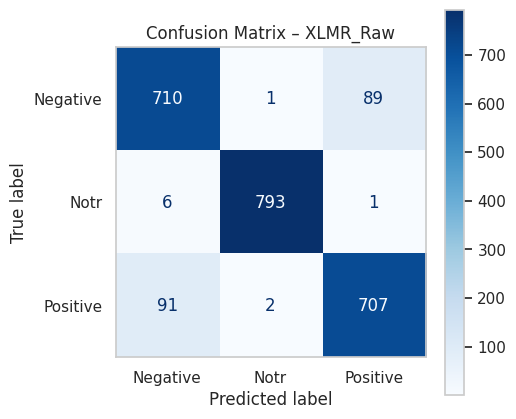

In [ ]:

# 4) XLM-R + RAW
res_xlmr_raw = train_and_evaluate(
    model_name=roberta_model_name,
    train_texts=train_raw,
    test_texts=test_raw,
    y_train=y_train,
    y_test=y_test,
    run_name="XLMR_Raw",
)
results.append({
    "Model": "XLM-RoBERTa",
    "Data": "Raw",
    "Accuracy":  res_xlmr_raw["eval_accuracy"],
    "Precision": res_xlmr_raw["eval_precision"],
    "Recall":    res_xlmr_raw["eval_recall"],
    "F1":        res_xlmr_raw["eval_f1"],
})

In [ ]:
results_df = pd.DataFrame(results)
display(results_df)


,Model,Data,Accuracy,Precision,Recall,F1
0,BERTurk,Clean,0.895000,0.894510,0.895000,0.894726
1,BERTurk,Raw,0.935417,0.935615,0.935417,0.935430
2,XLM-RoBERTa,Clean,0.864167,0.862928,0.864167,0.863124
3,XLM-RoBERTa,Raw,0.920833,0.921036,0.920833,0.920926


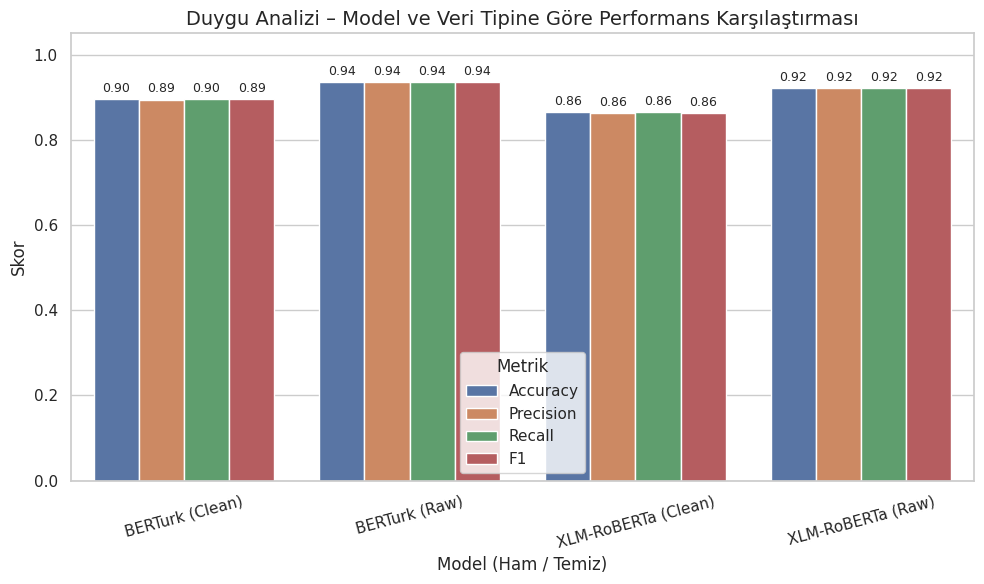

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df["Model_Data"] = results_df["Model"] + " (" + results_df["Data"] + ")"

metric_cols = ["Accuracy", "Precision", "Recall", "F1"]
plot_df = results_df.melt(
    id_vars=["Model_Data"],
    value_vars=metric_cols,
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=plot_df,
    x="Model_Data",
    y="Score",
    hue="Metric"
)

plt.ylim(0, 1.05)
plt.title("Duygu Analizi – Model ve Veri Tipine Göre Performans Karşılaştırması", fontsize=14)
plt.xlabel("Model (Ham / Temiz)", fontsize=12)
plt.ylabel("Skor", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=9, padding=3)

plt.legend(title="Metrik")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
